In [7]:
%load_ext autoreload
%autoreload 2

In [5]:
from in100_utils import *
from in100_utils_variable import *


In [6]:
def is_user_valid(username, userid):
    if username in user_names_dict:
        if  userid in user_names_dict[username]:
            return True
    return False


In [11]:
rankdata_by_level = {}
for i in range(20,27):
    rankdata_by_level[str(i)] = json.load(open(f"datamodules/in100RankData/{current_date}/rankdata_{i}.json"))
rankdata_by_level["27over"] = json.load(open(f"datamodules/in100RankData/{current_date}/rankdata_27over.json"))
songlist = pd.read_csv(f"datamodules/{current_version}/{current_patch}/songList_temp.csv")

In [12]:
def is_level_valid(songlevel):
    try:
        if not (20 <= int(songlevel[-2:]) <= 28):
            return False
    except ValueError:
        return False
    
    if len(songlevel) > 3:
        return False
    
    if len(songlevel) == 3:
        if songlevel[0] != "S" and songlevel[0] != "D":
            return False
    
    return True

is_level_valid("27")

True

In [73]:

def find_rankscorelist(rankdata_by_level, key, level_category):
    if key not in rankdata_by_level[level_category].keys():
        return []
    raw = rankdata_by_level[level_category][key]
    ans = []
    for item in raw:
        ans.append(item['score'])
    return ans

def gather_rankscores(rankdata_by_level, level):
    ans = {}
    for key in rankdata_by_level[level].keys():
        ans[key] = find_rankscorelist(rankdata_by_level, key, level)    
    return ans

    

In [74]:
level27over = gather_rankscores(rankdata_by_level, "27over")
level26 = gather_rankscores(rankdata_by_level, "26")
level25 = gather_rankscores(rankdata_by_level, "25")
level24 = gather_rankscores(rankdata_by_level, "24")

In [18]:
def name_in_songlist(songlist, name, index):
    if name.lower() in songlist["song"][index].lower():
        return True
    if name.lower() in songlist["kr_song"][index].lower():
        return True
    if name.lower() in songlist["kr_song_proxy"][index].lower():
        return True
    return False

def song_name_finder(songlist, name):
    anslist = []
    for i in range(len(songlist["song"])):
        if name_in_songlist(songlist, name, i):
            anslist.append(songlist["song"][i])
    return anslist


In [19]:
song_name_finder(songlist, "디스트")

['Indestructible', 'District 1', 'Destr0yer']

In [67]:
def song_data_finder_unit(rankdata_full,songname):
    ans = {}
    for level in rankdata_full.keys():
        for song in rankdata_full[level].keys():
            if songname == song[:-9]:
                ans[song] = rankdata_full[level][song]
    return ans
def song_data_finder(rankdata_full, songname):
    songnames = song_name_finder(songlist, songname)
    ans = {}
    for songname in songnames:
        temp = song_data_finder_unit(rankdata_full, songname)
        for item in temp:
            ans[item] = temp[item]
    return ans
song_data_finder(rankdata_by_level, "vacuum").keys()



dict_keys(['Vacuum Double21', 'Vacuum Single23', 'Vacuum Double25', 'Vacuum Cleaner Double20', 'Vacuum Cleaner Single25', 'Vacuum Cleaner Double26'])

In [77]:
level26["1949 Double26"]

[982218,
 980946,
 973855,
 966551,
 961575,
 958487,
 955768,
 954855,
 953845,
 953715,
 953474,
 950671,
 948127,
 944562,
 942931,
 941162,
 940855,
 940821,
 940731,
 940659,
 939321,
 937129,
 936904,
 936468,
 935049,
 934451,
 932076,
 931678,
 928983,
 928252,
 927425,
 927270,
 927099,
 926409,
 925805,
 924147,
 923651,
 922954,
 920789,
 920543,
 919630,
 918806,
 915775,
 914894,
 914511,
 914384,
 914255,
 912900,
 912894,
 912223,
 911710,
 911526,
 910650,
 910593,
 910245,
 909751,
 908374,
 907919,
 907099,
 905973,
 905815,
 904001,
 902917,
 902749,
 899444,
 895709,
 895603,
 891129,
 889833]

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
dig24 = find_rankscorelist(rankdata_by_level, "Dignity Double24", "24")
jupin25 = find_rankscorelist(rankdata_by_level, "Jupin Double25", "25")
mope25 = find_rankscorelist(rankdata_by_level, "Mopemope Double25", "25")
chase25 = find_rankscorelist(rankdata_by_level, "Etude Op 10-4 Double25", "25")
ulti25 = find_rankscorelist(rankdata_by_level, "Ultimatum Double25", "25")
repen26 = find_rankscorelist(rankdata_by_level, "Repentance Double26", "26")
leather26 = find_rankscorelist(rankdata_by_level, "Leather Double26", "26")
paradoxx26 = find_rankscorelist(rankdata_by_level, "Paradoxx Single26", "26")
chaos26 = find_rankscorelist(rankdata_by_level, "CHAOS AGAIN Double26", "26")
dement26 = find_rankscorelist(rankdata_by_level, "Dement ~After Legend~ Double26", "26")
vacuum26 = find_rankscorelist(rankdata_by_level, "Vacuum Cleaner Double26", "26")
print(len(dig24), len(jupin25), len(mope25), len(chase25), len(ulti25), len(repen26), len(leather26), len(paradoxx26))


100 100 66 100 100 89 100 100


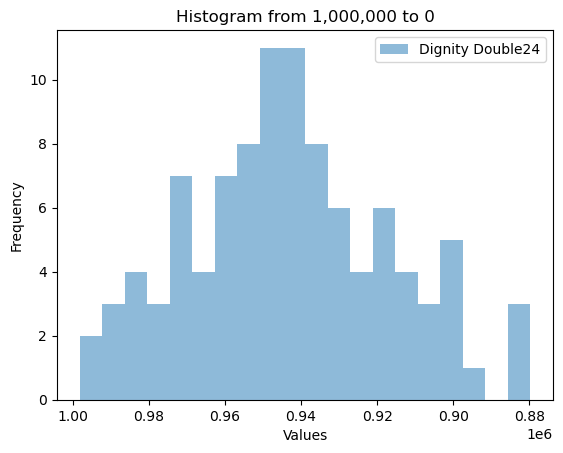

In [44]:
plt.hist(jupin25, bins=20, alpha=0.5, label='Dignity Double24')
# Invert the y-axis
plt.gca().invert_xaxis()

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram from 1,000,000 to 0')
plt.legend()

# Show the plot
plt.show()

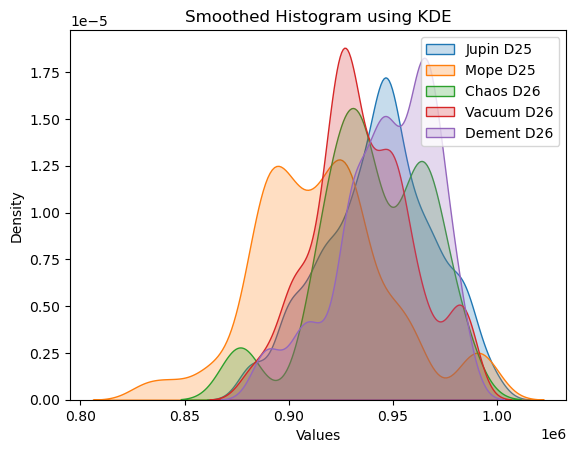

In [69]:

# Create KDE plot
sns.kdeplot(jupin25, bw_adjust=0.6, fill=True, label='Jupin D25')
#sns.kdeplot(chase25, bw_adjust=0.6, fill=True, label='Chase D25')
#sns.kdeplot(ulti25, bw_adjust=0.6, fill=True, label='Ulti D25')
sns.kdeplot(mope25, bw_adjust=0.6, fill=True, label='Mope D25')
#sns.kdeplot(repen26, bw_adjust=0.6, fill=True, label='Repen D26')
#sns.kdeplot(leather26, bw_adjust=0.6, fill=True, label='Leather D26')
sns.kdeplot(chaos26, bw_adjust=0.6, fill=True, label='Chaos D26')
#sns.kdeplot(paradoxx26, bw_adjust=0.5, fill=True, label='Paradoxx S26')
# Add labels and title
sns.kdeplot(vacuum26, bw_adjust=0.6, fill=True, label='Vacuum D26')
sns.kdeplot(dement26, bw_adjust=0.6, fill=True, label='Dement D26')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Smoothed Histogram using KDE')
plt.legend()

# Show the plot
plt.show()

In [109]:
def compare_kde(list_scores, list_names, bw_coord = 0.6):
    for i in range(len(list_scores)):
        sns.kdeplot(list_scores[i],bw_adjust=bw_coord, fill=True, label=list_names[i])
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.title('Smoothed Histogram using KDE')
    plt.legend()

    # Show the plot
    plt.show()

def compare_lineplot(list_scores, list_names):
    for i in range(len(list_scores)):
        plt.plot(list_scores[i], label=list_names[i])
    plt.legend()
    plt.show()

In [ ]:

list_score = [level26["1949 Double26"], level26["Cleaner Double26"], level26["Leather Double26"], level26["Achluoias Double26"], level26["Repentance Double26"], level26["ESCAPE Double26"]]
list_names = ["1949", "Cleaner", "Leather", "Achluoias", "Repentance", "Escape"]

compare_kde(list_score, list_names)

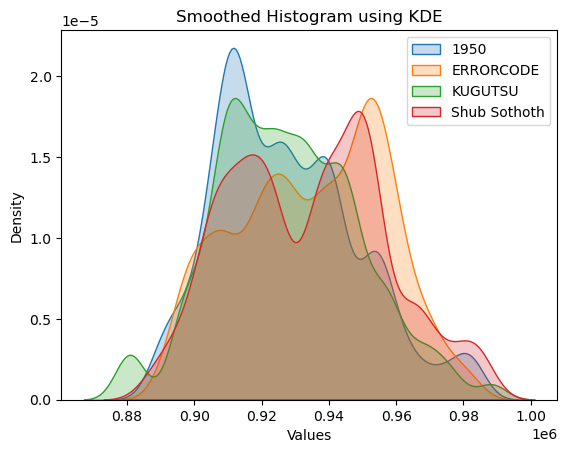

In [93]:
level27over.keys()

level27_lst = [level27over["1950 Double27"], level27over["ERRORCODE: 0 Double27"], level27over["KUGUTSU Double27"], level27over["Shub Sothoth Double27"]]
level27_str = ["1950", "ERRORCODE", "KUGUTSU", "Shub Sothoth"]
compare_kde(level27_lst, level27_str, 0.5)

In [113]:
level24.keys()

dict_keys(['Achluoias Double24', 'Aragami Double24', 'BEMERA Single24', 'CHAOS AGAIN Double24', 'ESCAPE Single24', 'Further Single24', 'GOOD NIGHT - FULL SONG - Single24', 'iRELLiA Double24', 'Leather Single24', 'Paradoxx - SHORT CUT - Single24', 'PRiMA MATERiA Double24', 'Shub Niggurath Single24', 'Skeptic Single24', 'Xeroize Single24', 'A Site De La Rue Double24', 'Annihilator Method Double24', 'Banya-P Guitar Remix Double24', 'BATTLE NO.1 Double24', 'Beat of The War Double24', 'BEDLAM Double24', 'Bee Double24', 'Beethoven Virus Double24', 'BRAIN POWER Double24', 'Brown Sky Double24', 'Canon D - FULL SONG - Double24', 'CROSS SOUL Double24', 'Curiosity Overdrive Double24', 'Dement ~After Legend~ Double24', 'Destr0yer Double24', 'Dignity Double24', 'ERRORCODE: 0 Double24', 'FFF Double24', 'Final Audition Ep. 2-2 Double24', 'Final Audition Ep. 2-X Double24', 'Full Moon Double24', 'Full Moon - FULL SONG - Double24', 'Galaxy Collapse Double24', 'GOOD NIGHT Double24', 'GOODTEK Double24', '

In [123]:
level24_lst = [level24["Dignity Double24"], level24["Full Moon - FULL SONG - Double24"], level24["Banya-P Guitar Remix Double24"], level24["Galaxy Collapse Double24"]]
level24_str = ["Dignity", "Full Moon Full", "P-Guitar", "Galaxy"]
level24_lst2 = [level24['Yog-Sothoth Double24'], level24["Full Moon - FULL SONG - Double24"], level24['Halcyon Double24'], level24['Neo Catharsis Double24']]
level24_str2 = ["Yog Sothoth", "Full moon", "halcyon", "Catharsis"]

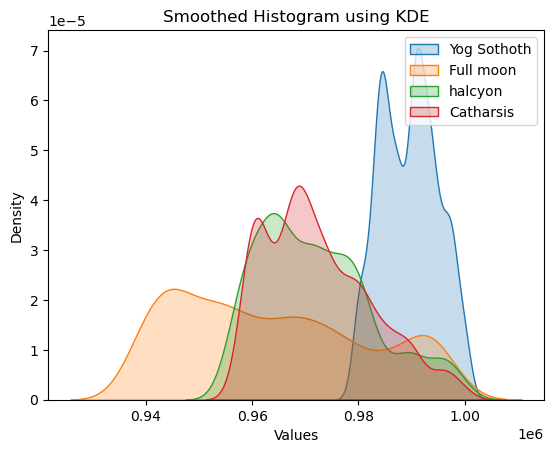

In [125]:
compare_kde(level24_lst2, level24_str2)

In [2]:
import json
testme = {"a": "apple", "b": "banana", "c": "cherry"}
json.dump(testme, open("testme.json", "w"))

In [103]:
level24_lst[0]

[994877,
 992904,
 988340,
 983466,
 983335,
 982931,
 981771,
 979583,
 979088,
 976569,
 973348,
 971633,
 971297,
 971226,
 970390,
 970033,
 969693,
 969372,
 969301,
 968976,
 968473,
 968401,
 967774,
 967698,
 966241,
 966084,
 965573,
 965108,
 964477,
 964164,
 963938,
 963720,
 963175,
 961930,
 961733,
 960783,
 959680,
 959453,
 959395,
 959335,
 959138,
 958700,
 958547,
 958336,
 957535,
 957525,
 957209,
 955793,
 955728,
 955658,
 955038,
 954973,
 953843,
 953534,
 953346,
 952975,
 952640,
 951839,
 951831,
 951790,
 951624,
 951503,
 951022,
 950768,
 950393,
 950310,
 949957,
 949858,
 949302,
 949253,
 949073,
 948261,
 948141,
 947911,
 947808,
 947009,
 946412,
 946340,
 946218,
 945375,
 945195,
 944783,
 944755,
 944471,
 944204,
 944018,
 943866,
 943801,
 943517,
 943451,
 943200,
 942837,
 942484,
 942286,
 942222,
 941976,
 941905,
 941778,
 941580,
 941572]